### Trial

In [12]:
from jaxa.earth import je
import os
import sys

sys.path.append(os.path.abspath('../illuminating'))


 - Collection : JAXA.EORC_ALOS.PRISM_AW3D30.v3.2_global
 - Date : 2021-02/, 
 - Resolution : 1.25 pixels per 1 degree 
 - Bounds : [-360, -90, 360, 90]
 - Band : DSM
 - Loading images No.0 : 2021-02/
   ------10------20------30------40------50------60------70------80------90-----100
   ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 - ROI mask : masked
 - Show images : 

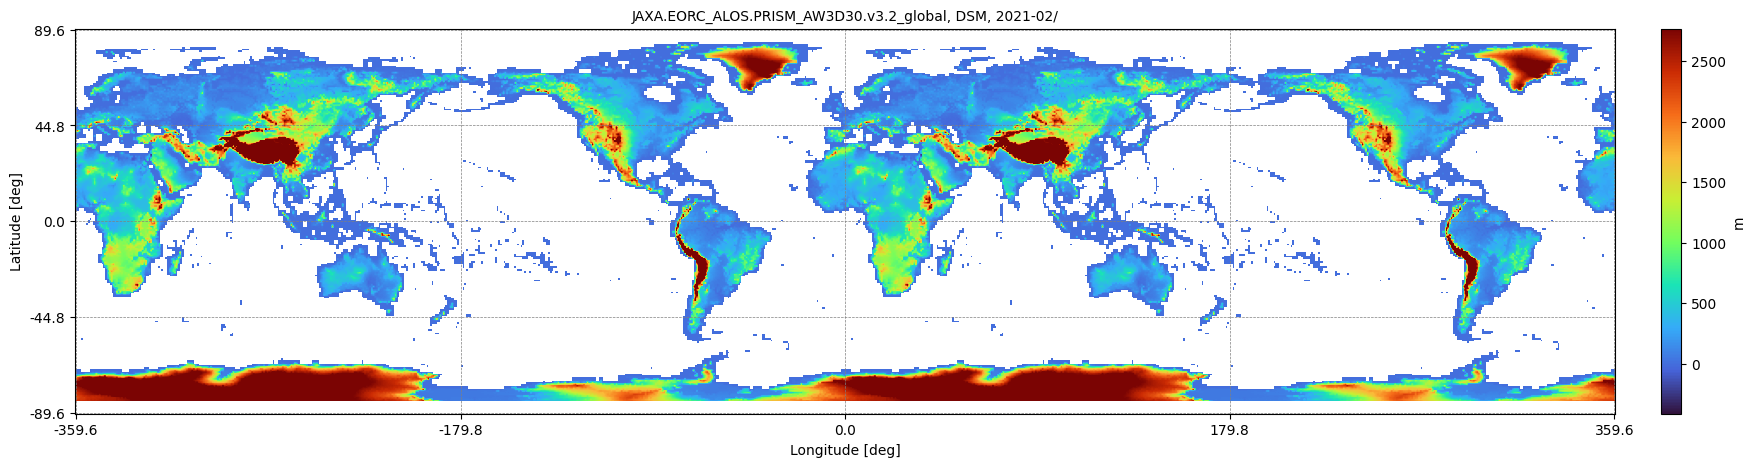

showed


In [10]:
data = je.ImageCollection(ssl_verify=True)\
         .filter_date()\
         .filter_resolution()\
         .filter_bounds()\
         .select()\
         .get_images()

# Process and show an image
img = je.ImageProcess(data)\
        .show_images()

### Land Cover

In [13]:
from illuminating.data_preparation.geodata_processing import download_gdf,create_grids
import geojson
root_path = os.path.abspath('../')

raw_data_path = os.path.join(root_path,"raw_data")

ModuleNotFoundError: No module named 'illuminating.data_preparation.geodata_processing'

In [4]:
USA_gdf=download_gdf("USA",1)

In [10]:
california_gdf = USA_gdf[USA_gdf.NAME_1== "California"]

In [19]:
root_path = os.path.abspath('../')
json_path = os.path.join(root_path,"raw_data","california_gdf.json")
json_path

'/home/kalimdorfolk/code/mashafif/illuminating_horizons/raw_data/california_gdf.json'

In [20]:
california_gdf.to_file(json_path, driver='GeoJSON')

 - Reading feature collection data : completed
 - Searching features from collection : 1 features found!
 - Collection : Copernicus.C3S_PROBA-V_LCCS_global_yearly
 - Date : 2019/, 
 - Resolution : 20.0 pixels per 1 degree 
 - Bounds : [-124.42, 32.53, -114.12, 42.01]
 - Band : LCCS
 - Loading images No.0 : 2019/
   ------10------20------30------40------50------60------70------80------90-----100
   ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 - ROI mask : masked
 - Show images : 

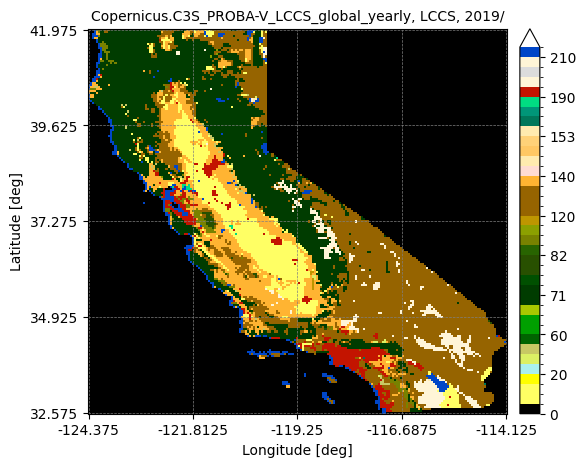

showed


In [24]:
dlim = ["2019-01-01T00:00:00","2019-01-01T00:00:00"]
ppu  = 20

# Set information of collection,band
collection = "Copernicus.C3S_PROBA-V_LCCS_global_yearly"
band       = "LCCS"

# Get feature collection data
geoj_path = json_path
geoj = je.FeatureCollection().read(geoj_path).select()

# Get an image
data = je.ImageCollection(collection=collection,ssl_verify=True)\
        .filter_date(dlim=dlim)\
        .filter_resolution(ppu=ppu)\
        .filter_bounds(geoj=geoj[0])\
        .select(band=band)\
        .get_images()

# Process and show an image
img = je.ImageProcess(data)\
        .show_images()

In [25]:
type(data)

jaxa.earth.je.ImageCollection

In [41]:
data.raster.latlim

array([[32.55, 42.  ]])

In [43]:
data.raster.lonlim

array([[-124.4, -114.1]])

In [62]:
data.raster.img[0].shape

(189, 206, 1)

In [80]:
california_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [63]:
(data.raster.lonlim[0][1]-data.raster.lonlim[0][0])

np.float64(0.5150000000000006)

In [65]:
x_px = data.raster.img[0].shape[1]

206

In [66]:
y_px = data.raster.img[0].shape[0]

189

In [69]:
x_range = data.raster.lonlim[0][1]-data.raster.lonlim[0][0]
y_range = data.raster.latlim[0][1]-data.raster.latlim[0][0]

(np.float64(10.300000000000011), np.float64(9.449999999999996))

In [70]:
x_res = x_range/x_px
y_res = y_range/y_px

(np.float64(0.05000000000000006), np.float64(0.049999999999999975))

In [72]:
from shapely.geometry import Polygon
x_start = data.raster.lonlim[0][0]
y_start = data.raster.latlim[0][0]

(np.float64(-124.4), np.float64(32.550000000000004))

In [161]:
x_start = data.raster.lonlim[0][1]
y_start = data.raster.latlim[0][1]

(np.float64(-114.1), np.float64(42.0))

In [162]:
from shapely import Polygon
def to_pixel(data):
    x_px = data.raster.img[0].shape[1]
    y_px = data.raster.img[0].shape[0]
    x_res = x_range/x_px
    y_res = y_range/y_px
    x_start = data.raster.lonlim[0][0]
    y_start = data.raster.latlim[0][1]

    poly_list=[]
    for y in range(0,y_px):
        for x in range(0,x_px):
            pixel = Polygon([[x_start,y_start],
                         [x_start+x_res,y_start],
                         [x_start+y_res,y_start+y_res],
                         [x_start,y_start+y_res]])
            poly_list.append(pixel)
            x_start+=x_res
        x_start = data.raster.lonlim[0][0]
        y_start-=y_res
    return poly_list


In [163]:
import geopandas as gpd
import pandas as pd
lc_coor = gpd.GeoDataFrame(pd.DataFrame({"geometry":to_pixel(data)}),crs=california_gdf.crs)

In [167]:
import numpy as np
total_row = data.raster.img.shape[1]*data.raster.img.shape[2]
landcover = np.reshape(data.raster.img,(total_row,1))

In [168]:
lc_coor["landcover"]=landcover

,geometry,landcover
0,"POLYGON ((-124.40000 42.00000, -124.35000 42.0...",0
1,"POLYGON ((-124.35000 42.00000, -124.30000 42.0...",0
2,"POLYGON ((-124.30000 42.00000, -124.25000 42.0...",0
3,"POLYGON ((-124.25000 42.00000, -124.20000 42.0...",210
4,"POLYGON ((-124.20000 42.00000, -124.15000 42.0...",90
...,...,...
38929,"POLYGON ((-114.35000 32.60000, -114.30000 32.6...",0
38930,"POLYGON ((-114.30000 32.60000, -114.25000 32.6...",0
38931,"POLYGON ((-114.25000 32.60000, -114.20000 32.6...",0
38932,"POLYGON ((-114.20000 32.60000, -114.15000 32.6...",0


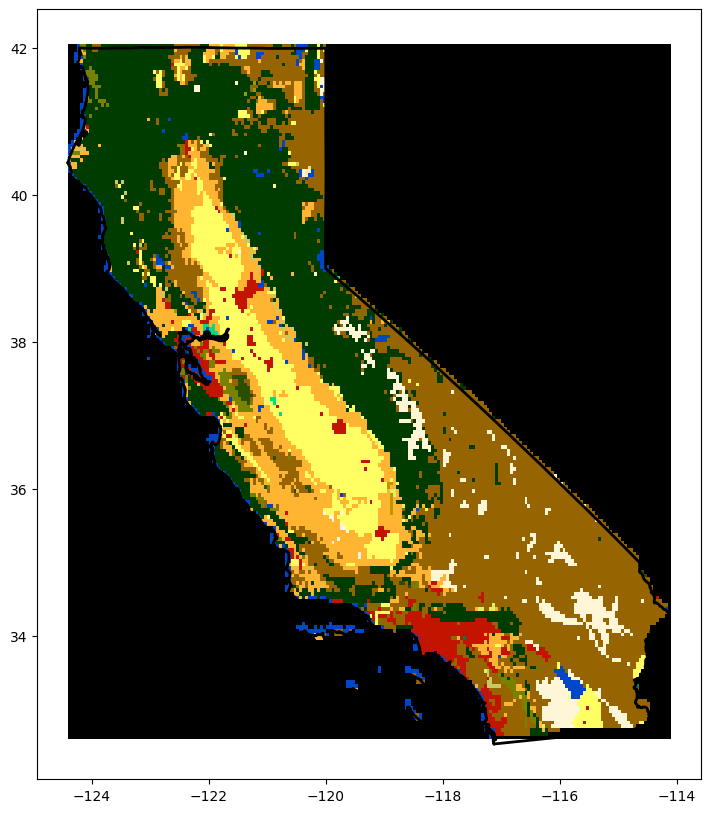

In [195]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the custom colors (replace with the actual hex values)
custom_colors = [
    '#000000', '#ffff64', '#aaf0f0','#dcf064', '#c8c864', '#006400', '#00a000',
    '#003c00','#285000', '#788200', '#8ca000', '#be9600', '#966400', '#ffb432',
    '#ffdcd2', '#ffebaf', '#00785a', '#009678', '#00dc82', '#c31400',
    '#fff5d7', '#0046c8', '#ffffff'
]

# Assign specific values to each color
values = [num for num in range(0,240,10)]

# Create the custom colormap
#custom_cmap = mcolors.ListedColormap(custom_colors)
cmap, norm = mcolors.from_levels_and_colors(values, custom_colors)

fig, ax = plt.subplots(figsize=(10, 10))
california_gdf.boundary.plot(ax=ax, color='black', linewidth=2)
lc_coor.plot(ax=ax,column="landcover",cmap=cmap,norm=norm)
plt.show();

In [201]:
geojson_path = os.path.join(raw_data_path,"california_landuse.geojson")

In [202]:
geojson_path

'/home/kalimdorfolk/code/mashafif/illuminating_horizons/raw_data/california_landuse.geojson'

In [203]:
lc_coor.to_file(geojson_path,driver="GeoJSON")